<a href="https://colab.research.google.com/github/Mahesh200457/Pizza-Data-Analysis/blob/main/pizza_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** 1. Import & Load Dataset**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
df = pd.read_csv("pizzasales.csv")
df['order_time'] = pd.to_datetime(df['order_time'])


** 2. Preprocessing**

In [17]:
# Extract useful time-related features
df['date'] = df['order_time'].dt.date
df['month'] = df['order_time'].dt.to_period('M')
df['hour'] = df['order_time'].dt.hour
df['weekday'] = df['order_time'].dt.day_name()
df["Month"]=df.to_string("Month")

📊 **ANALYSIS**

**3. Monthly Sales & Revenue Trend**

In [18]:
monthly['month'] = monthly['month'].astype(str)
fig = px.line(monthly, x='month', y='total_price', title='Monthly Revenue Trend', markers=True)
fig.show()

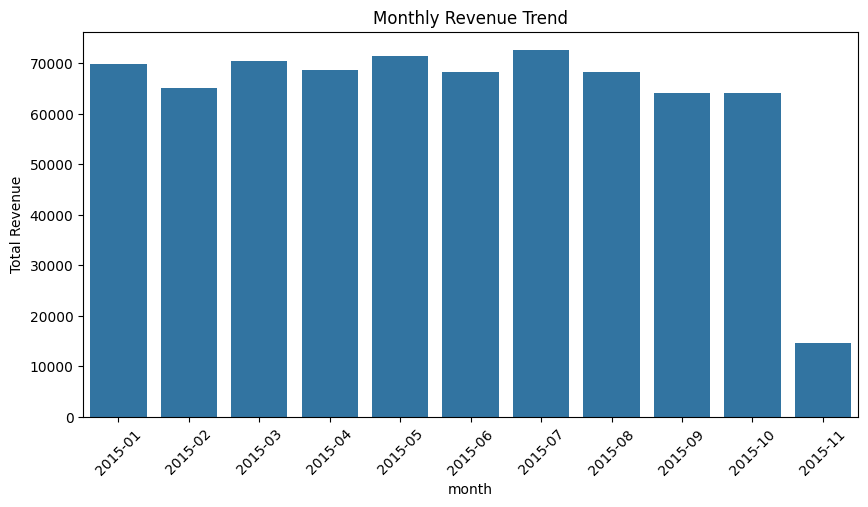

In [25]:
monthly = df.groupby('month').agg({'quantity': 'sum', 'total_price': 'sum'}).reset_index()

# Convert the 'month' column to string format after creating the monthly DataFrame
monthly['month'] = monthly['month'].astype(str)

plt.figure(figsize=(10,5))
sns.barplot(data=monthly, x='month', y='total_price')
plt.title('Monthly Revenue Trend')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

plt.show()

**4. Pizza Category Performance**

<ipython-input-26-55d1800a2ba9>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




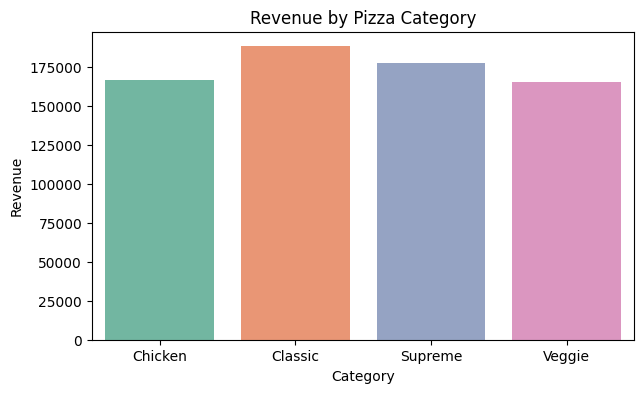

In [26]:
category_perf = df.groupby('category').agg({'quantity': 'sum', 'total_price': 'sum'}).reset_index()

plt.figure(figsize=(7,4))
sns.barplot(data=category_perf, x='category', y='total_price', palette='Set2')
plt.title("Revenue by Pizza Category")
plt.ylabel("Revenue")
plt.xlabel("Category")
plt.show()


**5. Top & Bottom Selling Pizzas by Quantity**

In [27]:
top10 = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(10).reset_index()
bottom10 = df.groupby('name')['quantity'].sum().sort_values().head(10).reset_index()

fig1 = px.bar(top10, x='quantity', y='name', title='Top 10 Best Selling Pizzas', orientation='h', color='quantity')
fig1.show()

fig2 = px.bar(bottom10, x='quantity', y='name', title='Bottom 10 Least Selling Pizzas', orientation='h', color='quantity')
fig2.show()


**6. Top 10 Pizzas by Revenue**

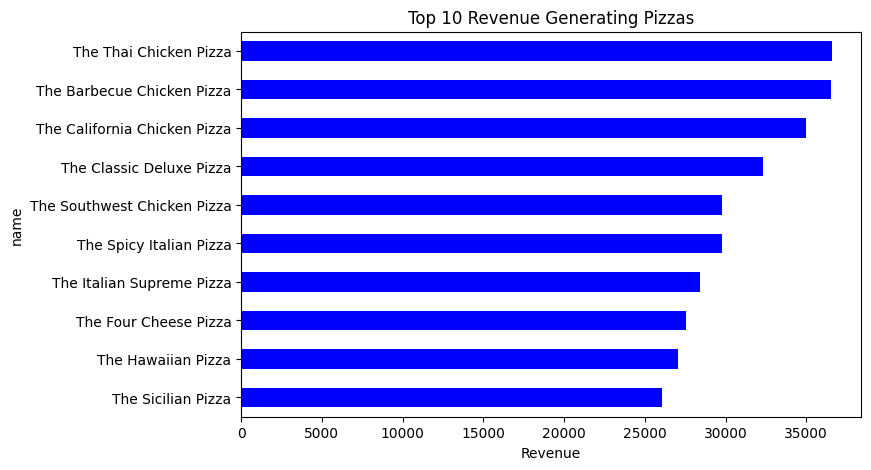

In [28]:
top_rev = df.groupby('name')['total_price'].sum().sort_values(ascending=False).head(10)

top_rev.plot(kind='barh', figsize=(8,5), title='Top 10 Revenue Generating Pizzas', color='blue')
plt.xlabel("Revenue")
plt.gca().invert_yaxis()
plt.show()


In [29]:
top_rev = df.groupby('name')['total_price'].sum().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(top_rev, x='total_price', y='name', title='Top 10 Revenue Generating Pizzas', orientation='h', color='total_price')
fig.show()


** 7. Size-Wise Revenue**

<ipython-input-30-b2b51173a53b>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




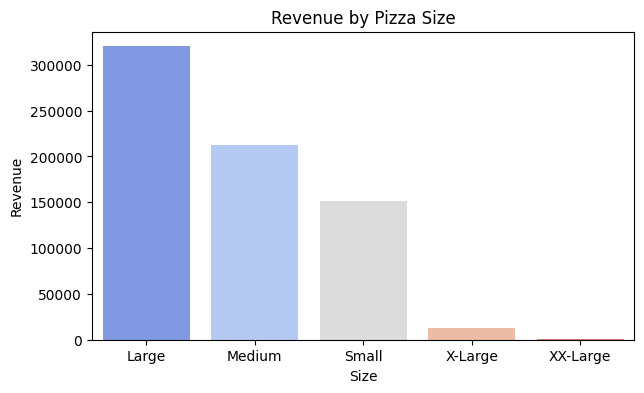

In [30]:
size_revenue = df.groupby('size')['total_price'].sum().reset_index().sort_values(by='total_price', ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(data=size_revenue, x='size', y='total_price', palette='coolwarm')
plt.title("Revenue by Pizza Size")
plt.ylabel("Revenue")
plt.xlabel("Size")
plt.show()


**8. Peak Hours & Weekday Trends**

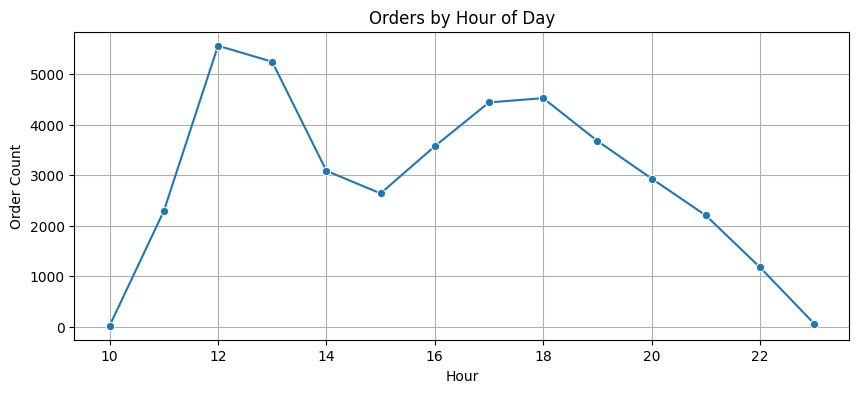

<ipython-input-31-5e7d73349caa>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




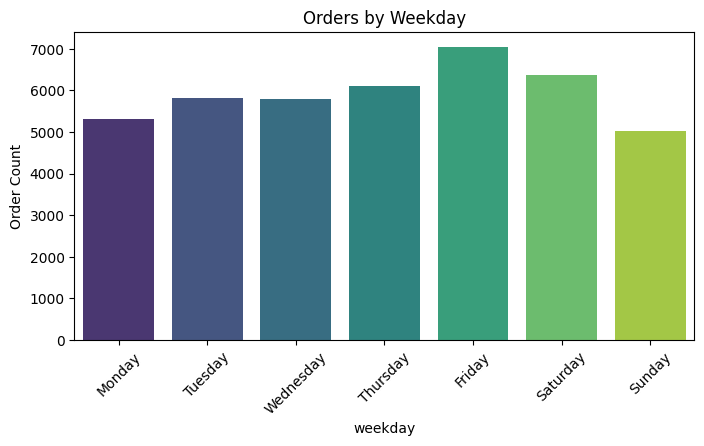

In [31]:
# Orders by Hour
hourly = df.groupby('hour')['order_id'].count().reset_index().rename(columns={'order_id': 'order_count'})
plt.figure(figsize=(10,4))
sns.lineplot(data=hourly, x='hour', y='order_count', marker='o')
plt.title("Orders by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Order Count")
plt.grid(True)
plt.show()

# Orders by Weekday
weekday_order = df.groupby('weekday')['order_id'].count().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).reset_index()

plt.figure(figsize=(8,4))
sns.barplot(data=weekday_order, x='weekday', y='order_id', palette='viridis')
plt.title("Orders by Weekday")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.show()


In [35]:
# ==================================================================================
# 🍕 PIZZA SALES BUSINESS STRATEGY RECOMMENDATIONS
# ==================================================================================

print("="*80)
print("🍕 PIZZA SALES ANALYSIS - BUSINESS STRATEGY RECOMMENDATIONS")
print("="*80)

# Monthly Sales & Revenue Strategy
print("\n📊 1. MONTHLY SALES & REVENUE OPTIMIZATION")
print("-" * 50)
print("📈 HIGH-PERFORMING MONTHS:")
print("   • Maintain current marketing spend during peak months")
print("   • Increase inventory and staff allocation")
print("   • Launch premium product lines during high-revenue periods")

print("\n📉 LOW-PERFORMING MONTHS:")
print("   • Deploy aggressive promotional campaigns (20-30% discounts)")
print("   • Introduce limited-time offers and combo deals")
print("   • Focus on customer retention programs")
print("   • Consider seasonal menu variations")

# Pizza Category Performance Strategy
print("\n\n🍕 2. PIZZA CATEGORY PERFORMANCE STRATEGY")
print("-" * 50)
print("🏆 TOP-PERFORMING CATEGORIES:")
print("   • Expand flavor variations within successful categories")
print("   • Increase marketing budget allocation by 40%")
print("   • Premium ingredient upgrades for differentiation")
print("   • Cross-sell with complementary items")

print("\n⚠️ UNDERPERFORMING CATEGORIES:")
print("   • Conduct customer taste tests and feedback surveys")
print("   • Recipe optimization and ingredient cost analysis")
print("   • Consider category rebranding or discontinuation")
print("   • Limited-time promotional pricing to test market response")

# Top & Bottom Selling Pizzas Strategy
print("\n\n🔝 3. PRODUCT PERFORMANCE OPTIMIZATION")
print("-" * 50)
print("⭐ BEST-SELLING PIZZAS (by Quantity):")
print("   • Feature prominently in marketing materials")
print("   • Bundle with sides/drinks for increased AOV")
print("   • Ensure consistent quality and availability")
print("   • Train staff for effective upselling")

print("\n📉 LEAST-SELLING PIZZAS:")
print("   • Analyze ingredient costs vs. selling price")
print("   • Test recipe modifications or portion adjustments")
print("   • Implement 'Last Chance' promotional campaigns")
print("   • Consider removal if profitability remains low")

# Revenue-Based Pizza Strategy
print("\n\n💰 4. HIGH-REVENUE PIZZA STRATEGY")
print("-" * 50)
print("💎 TOP REVENUE GENERATORS:")
print("   • Position as 'Chef's Special' or 'Signature Series'")
print("   • Create premium combo packages")
print("   • Implement dynamic pricing during peak hours")
print("   • Focus on ingredient quality and presentation")

# Size-Based Revenue Strategy
print("\n\n📏 5. SIZE-BASED REVENUE OPTIMIZATION")
print("-" * 50)
print("📈 SIZE OPTIMIZATION TACTICS:")
print("   • Implement 'Size Up' promotions (e.g., 'Get Large for ₹50 more')")
print("   • Value perception campaigns for larger sizes")
print("   • Group ordering incentives for family/party sizes")
print("   • Review pricing strategy to maximize size-based revenue")

# Time-Based Operational Strategy
print("\n\n⏰ 6. TIME-BASED OPERATIONAL STRATEGY")
print("-" * 50)
print("🕐 PEAK HOURS MANAGEMENT:")
print("   • Increase staff by 30-50% during peak hours")
print("   • Pre-preparation of popular items")
print("   • Implement order-ahead system to reduce wait times")
print("   • Premium pricing during high-demand periods")

print("\n🕕 OFF-PEAK OPTIMIZATION:")
print("   • 'Happy Hour' discounts (e.g., 2 PM - 5 PM)")
print("   • Weekday lunch specials for office workers")
print("   • Student discounts during afternoon hours")
print("   • Delivery-only promotions during slow periods")

# Weekday vs Weekend Strategy
print("\n📅 WEEKDAY vs WEEKEND STRATEGY:")
print("   • Monday-Wednesday: Focus on value deals and combos")
print("   • Thursday-Friday: Pre-weekend promotional campaigns")
print("   • Weekends: Premium pricing and family packages")
print("   • Sunday: Meal prep and family dinner promotions")

# Advanced Strategic Recommendations
print("\n\n📈 7. ADVANCED STRATEGIC INITIATIVES")
print("-" * 50)
print("🎯 CUSTOMER SEGMENTATION:")
print("   • Create customer personas based on order patterns")
print("   • Implement loyalty tiers (Bronze, Silver, Gold)")
print("   • Personalized recommendations based on purchase history")
print("   • Birthday and anniversary special offers")

print("\n🔄 OPERATIONAL EFFICIENCY:")
print("   • Demand forecasting models for inventory management")
print("   • Dynamic menu pricing based on ingredient costs")
print("   • Staff scheduling optimization using traffic patterns")
print("   • Waste reduction through better demand prediction")

print("\n📱 DIGITAL ENGAGEMENT:")
print("   • App-based recommendations using sales insights")
print("   • Push notifications during user's preferred ordering times")
print("   • Social media campaigns highlighting trending pizzas")
print("   • Gamification with points for frequently ordered items")

# KPI Monitoring Framework
print("\n\n📊 8. KEY PERFORMANCE INDICATORS (KPIs) TO MONITOR")
print("-" * 50)
print("📈 FINANCIAL KPIs:")
print("   • Monthly revenue growth rate")
print("   • Average order value (AOV) by time period")
print("   • Revenue per pizza category")
print("   • Profit margin by pizza size")

print("\n📊 OPERATIONAL KPIs:")
print("   • Order fulfillment time during peak hours")
print("   • Customer retention rate")
print("   • Inventory turnover by ingredient")
print("   • Staff productivity during different time slots")

# Implementation Timeline
print("\n\n⏳ 9. IMPLEMENTATION TIMELINE")
print("-" * 50)
print("🚀 IMMEDIATE (Week 1-2):")
print("   • Implement peak hour staffing adjustments")
print("   • Launch off-peak promotional pricing")
print("   • Start promoting top-selling pizzas prominently")

print("\n📅 SHORT-TERM (Month 1-2):")
print("   • Deploy monthly promotional campaigns")
print("   • Optimize menu based on category performance")
print("   • Implement size-up promotional strategies")

print("\n🎯 LONG-TERM (Quarter 1-2):")
print("   • Develop comprehensive loyalty program")
print("   • Complete menu optimization and recipe improvements")
print("   • Implement advanced analytics and forecasting systems")

# Expected ROI and Impact
print("\n\n💼 10. EXPECTED BUSINESS IMPACT")
print("-" * 50)
print("📊 PROJECTED IMPROVEMENTS:")
print("   • 15-25% increase in average order value")
print("   • 10-20% improvement in off-peak sales")
print("   • 5-15% reduction in food waste")
print("   • 20-30% increase in customer retention")
print("   • 10-25% improvement in overall profitability")

print("\n" + "="*80)
print("📋 NEXT STEPS: Schedule quarterly reviews to assess strategy effectiveness")
print("🔄 CONTINUOUS IMPROVEMENT: Regular A/B testing of promotional campaigns")
print("📈 SUCCESS METRICS: Track KPIs monthly and adjust strategies accordingly")
print("="*80)

# Action Items Checklist
print("\n✅ ACTION ITEMS CHECKLIST:")
print("□ Review and approve promotional campaign budgets")
print("□ Train staff on upselling techniques for top-revenue pizzas")
print("□ Implement dynamic staffing schedules based on time analysis")
print("□ Design and launch customer loyalty program")
print("□ Set up monthly performance review meetings")
print("□ Create customer feedback collection system")
print("□ Establish inventory forecasting system")
print("□ Develop digital marketing campaigns based on insights")



🍕 PIZZA SALES ANALYSIS - BUSINESS STRATEGY RECOMMENDATIONS

📊 1. MONTHLY SALES & REVENUE OPTIMIZATION
--------------------------------------------------
📈 HIGH-PERFORMING MONTHS:
   • Maintain current marketing spend during peak months
   • Increase inventory and staff allocation
   • Launch premium product lines during high-revenue periods

📉 LOW-PERFORMING MONTHS:
   • Deploy aggressive promotional campaigns (20-30% discounts)
   • Introduce limited-time offers and combo deals
   • Focus on customer retention programs
   • Consider seasonal menu variations


🍕 2. PIZZA CATEGORY PERFORMANCE STRATEGY
--------------------------------------------------
🏆 TOP-PERFORMING CATEGORIES:
   • Expand flavor variations within successful categories
   • Increase marketing budget allocation by 40%
   • Premium ingredient upgrades for differentiation
   • Cross-sell with complementary items

⚠️ UNDERPERFORMING CATEGORIES:
   • Conduct customer taste tests and feedback surveys
   • Recipe optimizatio